## Exercise Sheet 6

#### **Submission** <br> July 8th 12:00 p.m. (via studIP)
#### **Defense** <br> July 11th 8:00 - 11:00 a.m

A **maximum** of 5 percentage points bonus for the exam can be achieved with each sheet if:
1) at least 60% of the worksheet has been completed correctly 
2) the worksheet has been successfully defended (explained to the tutors).
*Conditions*:
- Each group must register for a slot in studIP for the defense.
- Successful defense means that a team member selected by us explains the solution and answers questions about it.
- ChatGPT and other tools may be used, but must be cited.
- The code must be explained without any aids.
- We will not only evaluate the correctness of the results, but also whether the code is efficient, easy to understand, tidy and well documented.
- Each group submits only one solution as a zip file, which is provided with the name and student number of a group member. For example, `mustermann_12345678.zip`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from utils import color1, color2, custom_cmap

---

## Exercise 1 (45%): K-Nearest-Neighbours/Logistic-Regression

a) (5%) Load the “samples.npy” and “labels.npy”. Visualize the samples in a scatterplot with the imported colors "color1" and "color2" for the different labels.

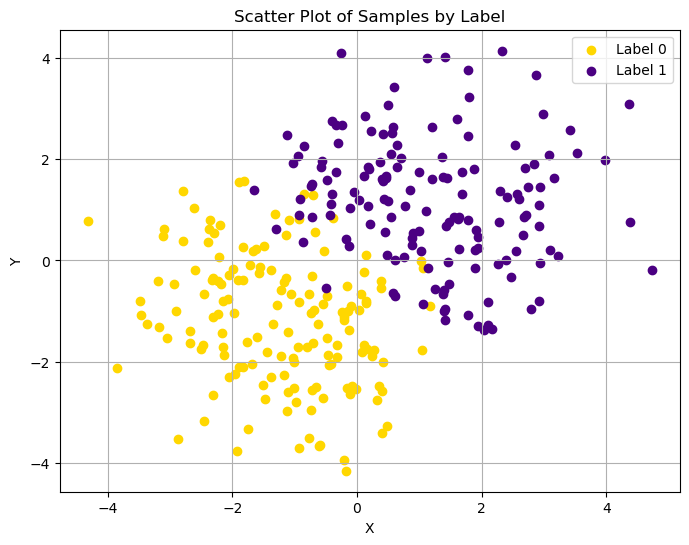

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from utils import color1, color2, custom_cmap

samples = np.load("samples.npy")

labels = np.load("labels.npy")

# Separate data points based on labels
samples_0 = samples[labels == 0]
samples_1 = samples[labels == 1]

plt.figure(figsize=(8, 6))

plt.scatter(samples_0[:, 0], samples_0[:, 1], c=color1, label="Label 0")

plt.scatter(samples_1[:, 0], samples_1[:, 1], c=color2, label="Label 1")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of Samples by Label")
plt.legend()

plt.grid(True)
plt.show()

b) (5%) Fit a KNeighborsClassifier algorithm from sklearn with k=2 and calculate the classification accuracy

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(
    samples, labels, test_size=0.2, random_state=42
)

k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN (k={k}): {accuracy:.2f}")

Accuracy of KNN (k=2): 0.93


c) (15%) Plot the fitted classification limits from b) into your figure from a). 

*Hint: Create a grid using `np.meshgrid`, then let your fitted KNeighborsClassifier classify each point. Plot the result using plt.imshow. You can use the imported “custom_cmap” as cmap.*

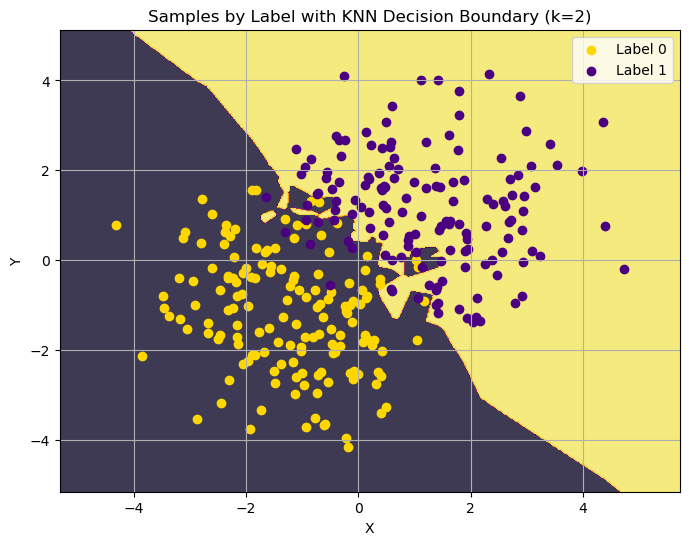

In [4]:
def plot_classification(samples, split_samples, classifier):
    h = 0.02  # Step size in the mesh
    x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
    y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)
    )

    # precidt labels for the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the decisiwillon classification limits
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap="inferno", alpha=0.8)

    # plot the original scatter plot
    plt.scatter(
        split_samples[0][:, 0],
        split_samples[0][:, 1],
        c=color1,
        label="Label 0",
    )
    plt.scatter(
        split_samples[1][:, 0],
        split_samples[1][:, 1],
        c=color2,
        label="Label 1",
    )

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(
            f"Samples by Label with KNN Decision Boundary (k={k})"
    )
    plt.legend()
    plt.grid(True)
    plt.show()


plot_classification(samples, (samples_0, samples_1), knn)

d) (5%) You will notice small islands in the classification boundaries. What is the smallest value of k at which the islands disappear? For which value of k is the accuracy best?

The islands seem to dissapear at around k = 6. The accuracy for k between 1 and 100 is never greater than 0.97, and k = 14 reaches that value first.

In [5]:
k_values = range(1, 101)
results = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    #print(f"Accuracy of KNN (k={k}): {accuracy:.2f}")
print(max(results))

0.9666666666666667


e) (5%) Load the test data “samples_test.npy” and “labels_test.npy” and calculate the accuracy for these too. What do you notice?

In [6]:
samples_test = np.load("samples_test.npy")
labels_test = np.load("labels_test.npy")

k = 2
# 20/80 split again
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    samples_test, labels_test, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_2, y_train_2)

y_pred_2 = knn.predict(x_test_2)

accuracy = accuracy_score(y_test_2, y_pred_2)
print(f"Accuracy of KNN (k={k}): {accuracy:.2f}")

Accuracy of KNN (k=2): 0.95


We notice that the accuracy is 0.95 rather than 0.93 for the same parameters.

f) (10%) Fit the data with a LogisticRegression from sklearn and create a plot like in c), one with the continuous classification "limits" and one with hard limits (threshold at 0.5). Compare the training and test accuracies. How are the results different from those of your KNeighborsClassifier?

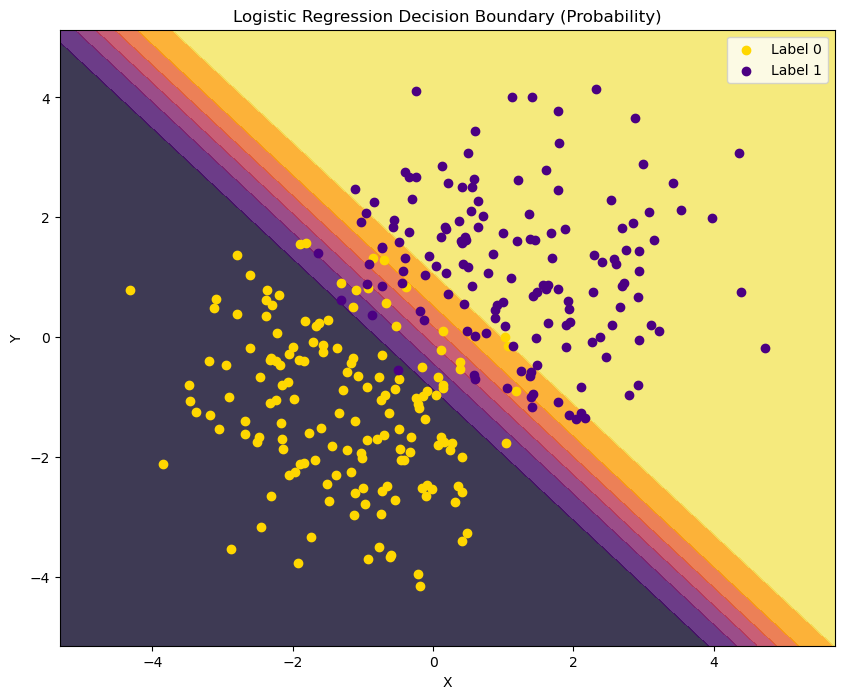

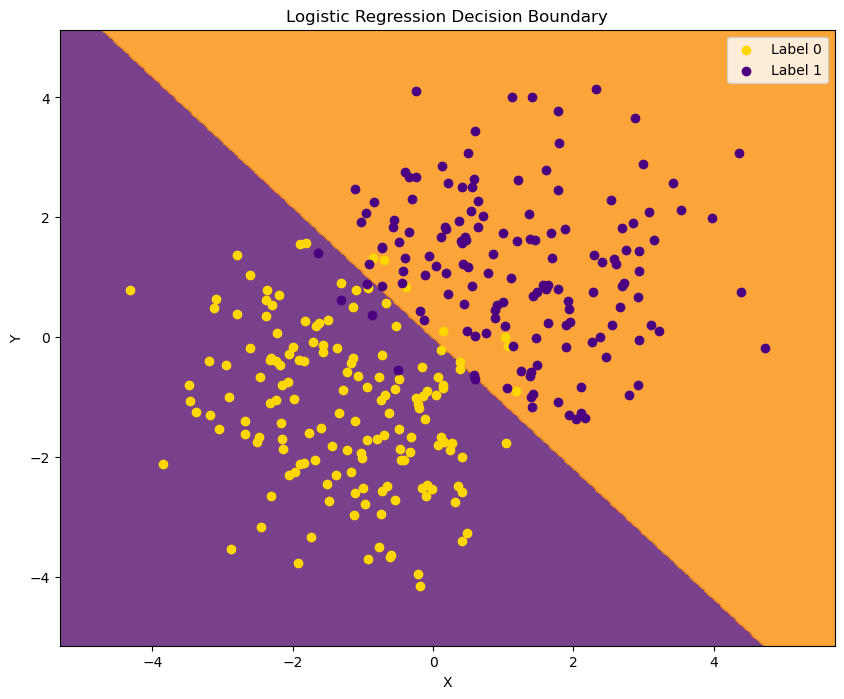

Logistic Regression - Training Accuracy: 0.9500
Logistic Regression - Test Accuracy: 0.9667
KNeighborsClassifier(k=2) - Training Accuracy: 0.9583
KNeighborsClassifier(k=2) - Test Accuracy: 0.9333


In [7]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Fit LogisticRegression
logit = LogisticRegression(random_state=42)
logit.fit(x_train, y_train)


# Function to plot decision boundaries
def plot_decision_boundary(classifier, X, y, is_probability=False):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)
    )

    if is_probability:
        Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    if is_probability:
        plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.8)
    else:
        plt.contourf(
            xx, yy, Z, cmap=custom_cmap, alpha=0.8, levels=[0, 0.5, 1]
        )

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c=color1, label="Label 0")
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c=color2, label="Label 1")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(
        "Logistic Regression Decision Boundary"
        + (" (Probability)" if is_probability else "")
    )
    plt.legend()
    plt.show()


# Plot continuous classification limits
plot_decision_boundary(logit, samples, labels, is_probability=True)

# Plot hard classification limits
plot_decision_boundary(logit, samples, labels, is_probability=False)

# same for KNN
# TODO decide which plot function to use for KNN.
# plot_decision_boundary(knn, samples, labels, is_probability=False)

# Calculate accuracies
y_train_pred = logit.predict(x_train)
y_test_pred = logit.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Logistic Regression - Training Accuracy: {train_accuracy:.4f}")
print(f"Logistic Regression - Test Accuracy: {test_accuracy:.4f}")

# Compare with KNeighborsClassifier
k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)

knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

print(f"KNeighborsClassifier(k={k}) - Training Accuracy: {knn_train_accuracy:.4f}")
print(f"KNeighborsClassifier(k={k}) - Test Accuracy: {knn_test_accuracy:.4f}")

---

## Exercise 2 (55%): Cross Validation

For this task only use the KNeighborsClassifier from sklearn. If you get stuck with a subtask, you can also use other functions from sklearn, such as `train_test_split` or `cross_val_score`. But then of course without receiving the points from the respective sub-task.

a) (10%) Load the data "ex2_samples.npy" and "ex2_labels.npy" and visualize them as in task 1. You will see that the data is not classifiable with a linear classifier. Write a function that transforms the data into a different coordinate system in which it is easier to classify.

We noticed a central tendency in the data and decided to apply a polar transformation, which leads to a nice linear separation.

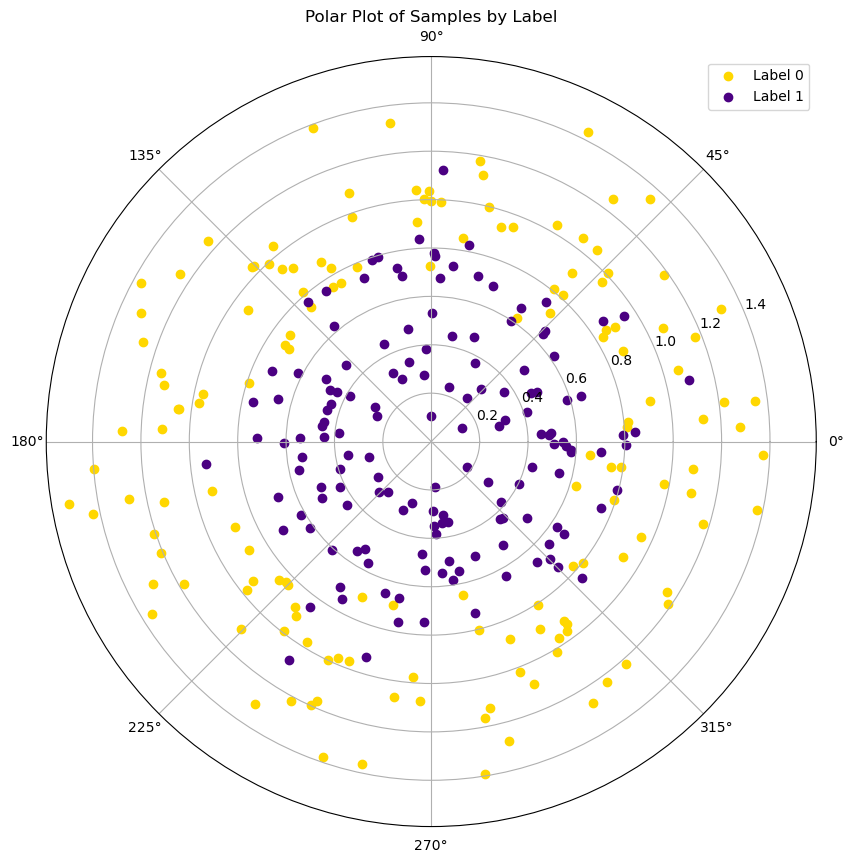

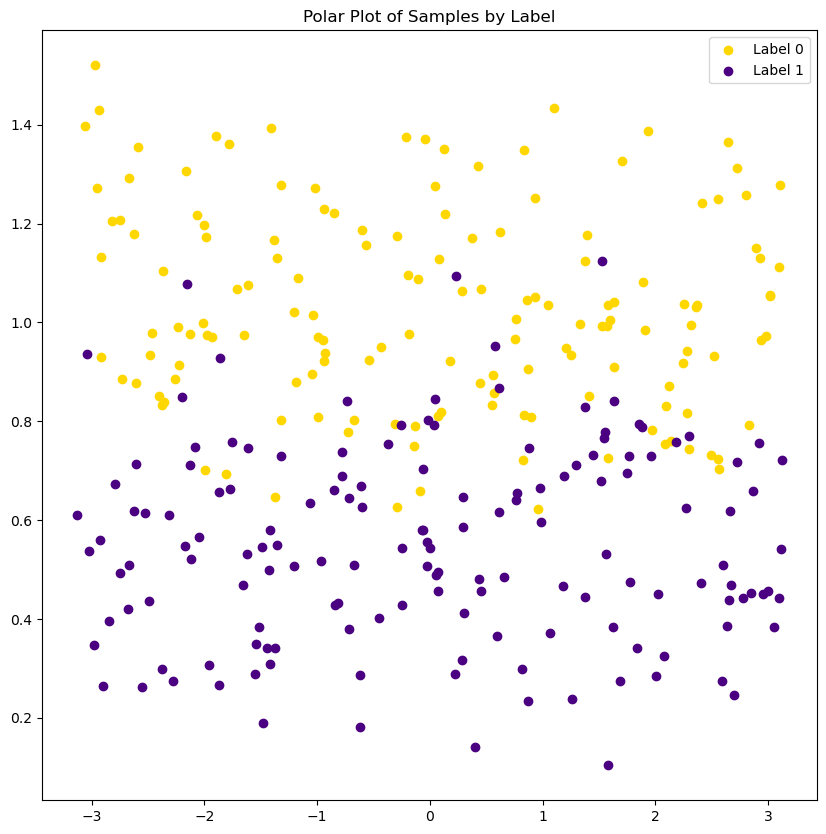

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from utils import color1, color2

# src: https://stackoverflow.com/a/26757297
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta


def plot_samples(samples, labels, color1, color2, projection=None):
    r, theta = cartesian_to_polar(samples[:, 0], samples[:, 1])

    r_0 = r[labels == 0]
    theta_0 = theta[labels == 0]
    r_1 = r[labels == 1]
    theta_1 = theta[labels == 1]

    _, ax = plt.subplots(
        figsize=(10, 10), subplot_kw=dict(projection=projection)
    )

    ax.scatter(theta_0, r_0, c=color1, label="Label 0")
    ax.scatter(theta_1, r_1, c=color2, label="Label 1")

    ax.set_title("Polar Plot of Samples by Label")
    ax.legend()

    plt.show()


ex2_samples = np.load("ex2_samples.npy")
ex2_labels = np.load("ex2_labels.npy")

# projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}
plot_samples(ex2_samples, ex2_labels, color1, color2, "polar")
plot_samples(ex2_samples, ex2_labels, color1, color2)

b) (10%) Fit a KNeighborsClassifier for different values of "k" on the training data and calculate the accuracy for the training and test data. Create a plot for "k" vs "Accuracy" for training and test accuracy

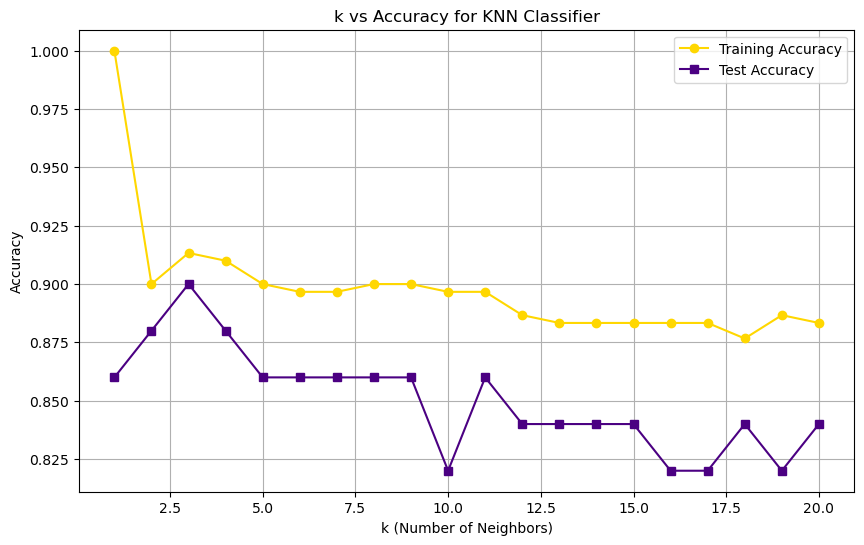

The best k value based on test accuracy is: 3


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from utils import color1, color2

# adjusted
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return np.column_stack((r, theta))


def calculate_accuracy(true_labels, predicted_labels):
    """
    Calculate the accuracy of predictions.

    Args:
    true_labels (array-like): The true labels
    predicted_labels (array-like): The predicted labels

    Returns:
    float: The accuracy as a value between 0 and 1
    """
    correct_predictions = np.sum(true_labels == predicted_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions


ex2_samples_train = np.load("ex2_samples.npy")
ex2_labels_train = np.load("ex2_labels.npy")
ex2_samples_test = np.load("ex2_samples_test.npy")
ex2_labels_test = np.load("ex2_labels_test.npy")

samples_train_polar = cartesian_to_polar(
    ex2_samples_train[:, 0], ex2_samples_train[:, 1]
)
samples_test_polar = cartesian_to_polar(ex2_samples_test[:, 0], ex2_samples_test[:, 1])

k_values = range(1, 21)  # Testing k from 1 to 20

train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(samples_train_polar, ex2_labels_train)

    train_pred = knn.predict(samples_train_polar)
    train_acc = calculate_accuracy(ex2_labels_train, train_pred)
    train_accuracy.append(train_acc)

    test_pred = knn.predict(samples_test_polar)
    test_acc = calculate_accuracy(ex2_labels_test, test_pred)
    test_accuracy.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, label="Training Accuracy", marker="o", color=color1)
plt.plot(k_values, test_accuracy, label="Test Accuracy", marker="s", color=color2)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy for KNN Classifier")
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(test_accuracy)]
print(f"The best k value based on test accuracy is: {best_k}")

c) (30%) Split your training data into different training and validation sets and perform CrossValidation to find the best value for "k".

The best k value based on cross-validation is: 8
Test accuracy with best k from cross-validation (k=8): 0.8600
The best k value based on test data (from part b) is: 3
Test accuracy with best k from test data (k=3): 0.9000


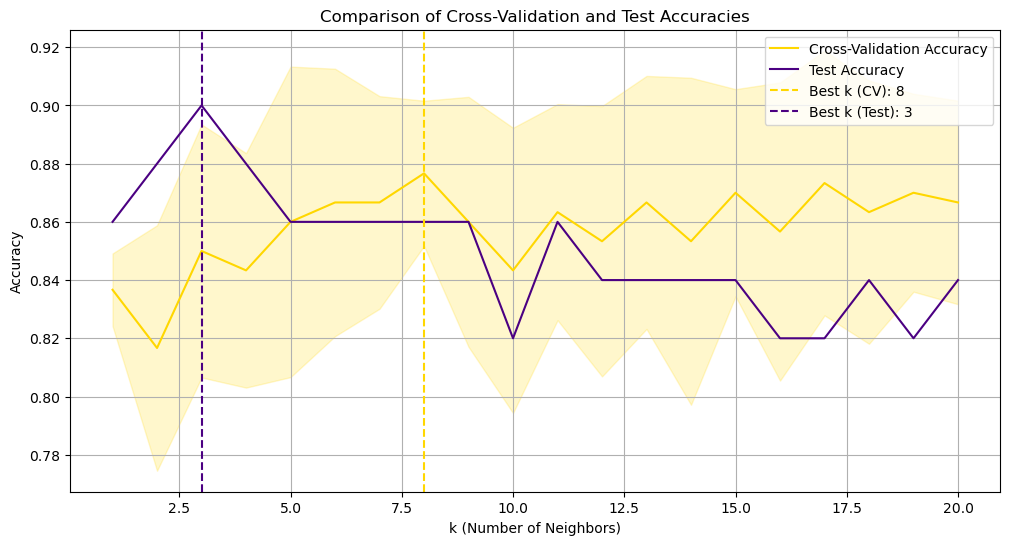

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from utils import color1, color2


def generate_splits(n_samples, n_splits, random_state=None):
    """
    Generate indices for cross-validation splits.

    Args:
    n_samples (int): Total number of samples
    n_splits (int): Number of splits for cross-validation
    random_state (int): Controls the randomness of the splits

    Returns: List of tuples (train_indices, val_indices)
    """
    fold_size = n_samples // n_splits
    indices = np.arange(n_samples)

    if random_state is not None:
        np.random.seed(random_state)
        np.random.shuffle(indices)

    splits = []
    for i in range(n_splits):
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else n_samples

        val_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])

        splits.append((train_indices, val_indices))

    return splits


def custom_cross_val_score(X, y, clf, n_splits=5, random_state=None):
    """
    Perform cross-validation and return scores.

    Args:
    X (array-like): The input samples
    y (array-like): The target values
    clf: The classifier object
    n_splits (int): Number of splits for cross-validation
    random_state (int): Controls the randomness of each fold

    Returns: list of scores
    """
    splits = generate_splits(len(X), n_splits, random_state)
    scores = []

    for train_indices, val_indices in splits:
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        score = calculate_accuracy(y_val, y_pred)
        scores.append(score)

    return np.array(scores)


samples_train = np.load("ex2_samples.npy")
labels_train = np.load("ex2_labels.npy")
samples_test = np.load("ex2_samples_test.npy")
labels_test = np.load("ex2_labels_test.npy")

samples_train_polar = cartesian_to_polar(
    samples_train[:, 0], samples_train[:, 1]
)
samples_test_polar = cartesian_to_polar(samples_test[:, 0], samples_test[:, 1])

# Perform cross-validation
k_values = range(1, 21)  # Testing k from 1 to 20
n_splits = 5
cv_scores_mean = []
cv_scores_std = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = custom_cross_val_score(
        samples_train_polar,
        labels_train,
        knn,
        n_splits=n_splits,
        random_state=42,
    )
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

# Find the best k value based on cross-validation
best_k_cv = k_values[np.argmax(cv_scores_mean)]
print(f"The best k value based on cross-validation is: {best_k_cv}")

# Train the final model with the best k from cross-validation
best_knn_cv = KNeighborsClassifier(n_neighbors=best_k_cv)
best_knn_cv.fit(samples_train_polar, labels_train)

# Evaluate on the test set
test_pred_cv = best_knn_cv.predict(samples_test_polar)
test_accuracy_cv = calculate_accuracy(labels_test, test_pred_cv)
print(
    f"Test accuracy with best k from cross-validation (k={best_k_cv}): {test_accuracy_cv:.4f}"
)

# Compare with previous best k on test data (from b)
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(samples_train_polar, labels_train)
    test_pred = knn.predict(samples_test_polar)
    test_accuracies.append(calculate_accuracy(labels_test, test_pred))

best_k_test = k_values[np.argmax(test_accuracies)]
print(f"The best k value based on test data (from part b) is: {best_k_test}")
print(
    f"Test accuracy with best k from test data (k={best_k_test}): {max(test_accuracies):.4f}"
)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(
    k_values,
    cv_scores_mean,
    color=color1,
    linestyle="-",
    label="Cross-Validation Accuracy",
)
plt.fill_between(
    k_values,
    np.array(cv_scores_mean) - np.array(cv_scores_std),
    np.array(cv_scores_mean) + np.array(cv_scores_std),
    color=color1,
    alpha=0.2,
)
plt.plot(
    k_values,
    test_accuracies,
    color=color2,
    linestyle="-",
    label="Test Accuracy",
)
plt.axvline(
    x=best_k_cv,
    color=color1,
    linestyle="--",
    label=f"Best k (CV): {best_k_cv}",
)
plt.axvline(
    x=best_k_test,
    color=color2,
    linestyle="--",
    label=f"Best k (Test): {best_k_test}",
)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Comparison of Cross-Validation and Test Accuracies")
plt.legend()
plt.grid(True)
plt.show()


d) (5%) Plot "k" vs "CrossValidation Accuracy" with associated error bars. Does the value for “k” you determined in this way match the previously obtained best value for “k” on the test data?

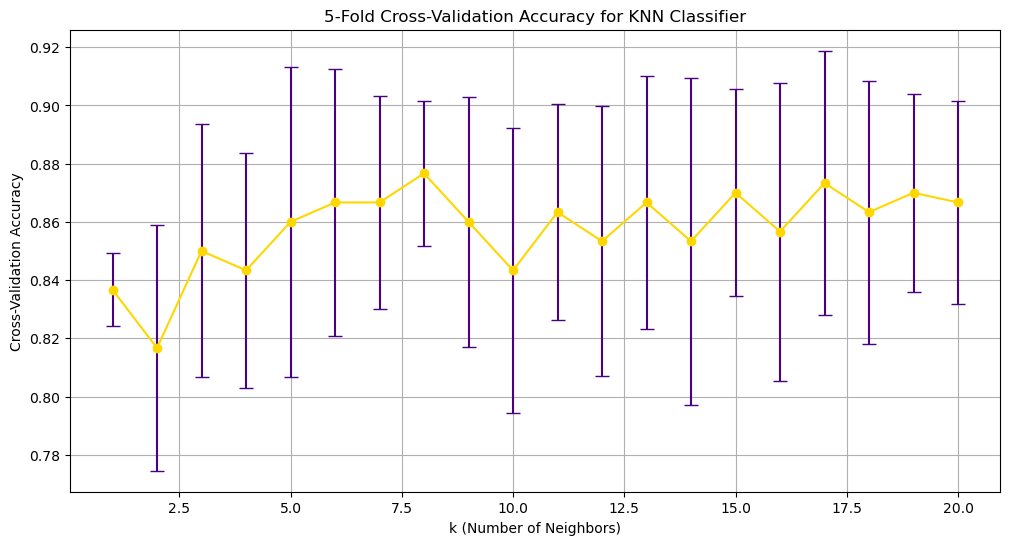

Best `k` by cross validation: 8
Best previous `k` on test data: 3
Match: no


In [11]:
# Plot k vs Cross-Validation Accuracy with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(
    k_values,
    cv_scores_mean,
    yerr=cv_scores_std,
    fmt="o-",
    capsize=5,
    color=color1,
    ecolor=color2,
)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title(f"{n_splits}-Fold Cross-Validation Accuracy for KNN Classifier")
plt.grid(True)
plt.show()

print(f"Best `k` by cross validation: {best_k_cv}")
print(f"Best previous `k` on test data: {best_k_test}")
print(f"Match: {'yes' if best_k_cv == best_k_test else 'no'}")

---